In [6]:
#imports
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import pandas as pd #dataframes
#import cv2 as cv
import PIL #image analysis
import glob #for getting list of files in a directory
import os #for file paths
import scipy
import skimage
from skimage import io
import imagej
from collections import defaultdict

In [249]:
%matplotlib inline

In [3]:
ij = imagej.init()

# Noise Reduction

## Image Average and Static Subtraction
This program helps remove noise from images by averaging them out and subtracting the average static from them. It opens an image file that contains both pictures and images of static, sorts them into their respective categories, averages them, and the subtracts the average static from the average picture. It also works with a specific file structure of a category folder containing multiple image folders by searching through the category folder for image folders and then condensing each image folder into a static-reduced average.

Note:
- the file structure is important, need to manually make a receptacle file in the composites folder to process new images
- all images must have the same dimensions
- could condense with functions
- as of now, the static subtraction doesn't work as intended

## Test Code for Program

In [ ]:
# prototype
path = '/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry'

# Loop that finds the directoy of all the image forlders inside the category folder
for wavelength in next(os.walk(path))[1]:
    wave_dir = os.path.join(path, wavelength)
    
    # Prepares a list for the pictures to be stored in and then unloads all the pictures in an image folder into it
    pictures = []
    pictures.clear()
    for picture in glob.glob(wave_dir + '/*'):
        pictures.append(np.array(PIL.Image.open(picture)).astype(np.uint16))

    # Preparing for stacking and averaging the pictures. 
    interest = np.zeros(pictures[0].shape) #array
    interestCount = 0 #for averaging the stacked image
    size = (interest.size) #for getting the average brightness

    # Stacking and counting the pictures. Pictures are filtered by their higher average brightness than static images
    for image in pictures:   
        if image.sum()/size > 10: 
            interest += image
            interestCount += 1
            
    # Static image array preparation. 
    statics = np.zeros(pictures[0].shape) 
    staticCount = 0 
    
    # Stacking and counting static images.
    for static in pictures:
        if static.sum()/size < 10: 
            statics += static
            staticCount += 1
    
    # Setting up the file pathing to for result files
    sand_images = os.path.dirname(path) 
    category = os.path.basename(path)
    pre_path = os.path.join(sand_images, 'Composites', category, wavelength)

    # if/else averages images, also checks to see if there are static images that can be subtracted from the main images and operates accordingly
    # Image file names are marked with a '-' if were subtracted from
    if staticCount < 1:
        result = (interest/interestCount).astype(np.uint8)
        img = PIL.Image.fromarray(result)
        fileName = pre_path + '.png'
        img.save(fileName)
        print(fileName)

    else:
        result = (interest/interestCount).astype(np.uint8) - (statics/staticCount).astype(np.uint8)
        img = PIL.Image.fromarray(result)
        fileName = pre_path + '-.png'
        img.save(fileName)
        print(fileName)

In [4]:
# searching the category folder for image folder and then getting their paths 
path = "/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry"

for wavelength in next(os.walk(path))[1]:
    wave_dir = os.path.join(path, wavelength)
    print(wave_dir)

/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0525
/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0630
/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0870
/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0935
/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0590
/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/1020
/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0770
/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0455
/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0365_L
/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0850


In [4]:
path = '/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0455'

#list to store picture arrays in
pictures = []
pictures.clear()

#getting the pictures from the directory and converting them into picture arrays and compiling them into a list
for name in glob.glob(path + '/*'): #picture directory
    pictures.append(np.array(PIL.Image.open(name)).astype(np.uint16))

pictures

[array([[154, 157, 154, ..., 160, 157, 157],
        [156, 157, 156, ..., 157, 158, 156],
        [157, 157, 156, ..., 154, 158, 159],
        ...,
        [140, 139, 139, ..., 110, 111, 113],
        [142, 139, 140, ..., 110, 111, 111],
        [141, 140, 140, ..., 114, 114, 111]], dtype=uint16),
 array([[156, 156, 155, ..., 155, 158, 159],
        [154, 153, 155, ..., 158, 156, 156],
        [157, 155, 156, ..., 157, 158, 159],
        ...,
        [138, 138, 137, ..., 111, 112, 110],
        [143, 140, 138, ..., 112, 110, 112],
        [142, 139, 141, ..., 111, 111, 112]], dtype=uint16),
 array([[0, 0, 0, ..., 3, 2, 0],
        [0, 0, 2, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 4, 0],
        ...,
        [3, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 1, 0, 0],
        [0, 0, 5, ..., 1, 0, 1]], dtype=uint16),
 array([[0, 0, 3, ..., 0, 0, 7],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 2, ..., 6, 0, 0],
        ...,
        [0, 0, 0, ..., 3, 0, 0],
        [2, 0, 7, ..., 0, 0, 0

In [1]:
# stacking the pictures
interest = np.zeros(pictures[0].shape)
interestCount = 0 
size = pictures[0].size

for image in pictures:   
    if image.sum()/size > 10: # a filter that excludes the static images
        interest += image
        interestCount += 1

print('number of images:',interestCount)        
print('images stacked:')  
print((interest/interestCount).astype(np.uint8))

NameError: name 'np' is not defined

In [271]:
# stacking the static
statics = np.zeros(pictures[0].shape)
staticCount = 0 
size = pictures[0].size

for static in pictures:   
    if static.sum()/size < 10: # a filter that excludes the static images
        statics += static
        staticCount += 1

print('number of static:',staticCount)        
print('static stacked:')  
print((statics/staticCount).astype(np.uint8))

In [273]:
#prototype pathing and file export

#setup for file pathing 
folder = os.path.dirname(path) 
category = os.path.basename(folder)

#averages images, also checks to see if there are static images that can be subtracted from the main images and operates accordingly
#image file names are marked with a '-' if were subtracted from
if staticCount < 1:
    result = (interest/interestCount).astype(np.uint8)
    img = PIL.Image.fromarray(result)
    base = os.path.basename(path) + '.png'
    fileName = os.path.join(os.path.dirname(folder), 'Composites', category, base)
    img.save(fileName)

else:
    result = (interest/interestCount).astype(np.uint8) - (statics/staticCount).astype(np.uint8)
    img = PIL.Image.fromarray(result)
    base = os.path.basename(path) + '-.png'
    fileName = os.path.join(os.path.dirname(folder), 'Composites', category, base)
    img.save(fileName)

print(fileName)
print('result:')
print(result)

In [35]:
#for saving an image of the average static
img = PIL.Image.fromarray((statics).astype(np.uint8))
folder = os.path.dirname(path) 
category = os.path.basename(folder)
base = os.path.basename(path) + 'statics.png'
fileName = os.path.join(os.path.dirname(folder), 'Composites', category, base)
img.save(fileName)
print(fileName)

/Users/fanjx1/Documents/SandImages/Composites/ParaffinWax-Dry/0455statics.png


In [23]:
#listing average values of each photo
values = []
values.clear()
size = pictures[0].size

for picture in pictures:

    values.append(picture.sum()/size)
    
values

[125.25056440845569,
 125.25849859174438,
 0.4769564075630252,
 0.4728326426724536,
 125.2704769407763,
 125.27198619832548,
 0.4752468295010312,
 125.26375237595038,
 0.47571745044171515,
 125.2690477633361,
 125.23807311386093,
 0.4759483120171145,
 125.26317209576138,
 0.48044386023640223,
 125.24415655685351,
 0.4738229426385939,
 0.47394967602425586,
 0.47569821197709855,
 125.27465000423246,
 0.4837449402838058]

In [22]:
#finding the unique values in the average of static array
staticValues = pd.DataFrame(statics/staticCount).astype(np.uint8).stack().value_counts()
np.array(sorted([*staticValues.index]))

NameError: name 'statics' is not defined

# Image Statistics

## Value v Quantity & Statistics for each condition, by Wavelength/Material
Gets the histogram and calculates the stats of the histogram for all the conditions of the same material in the same wavelength, then graphs displays them on a single graph/table. Repeats for all the wavelengths recorded.

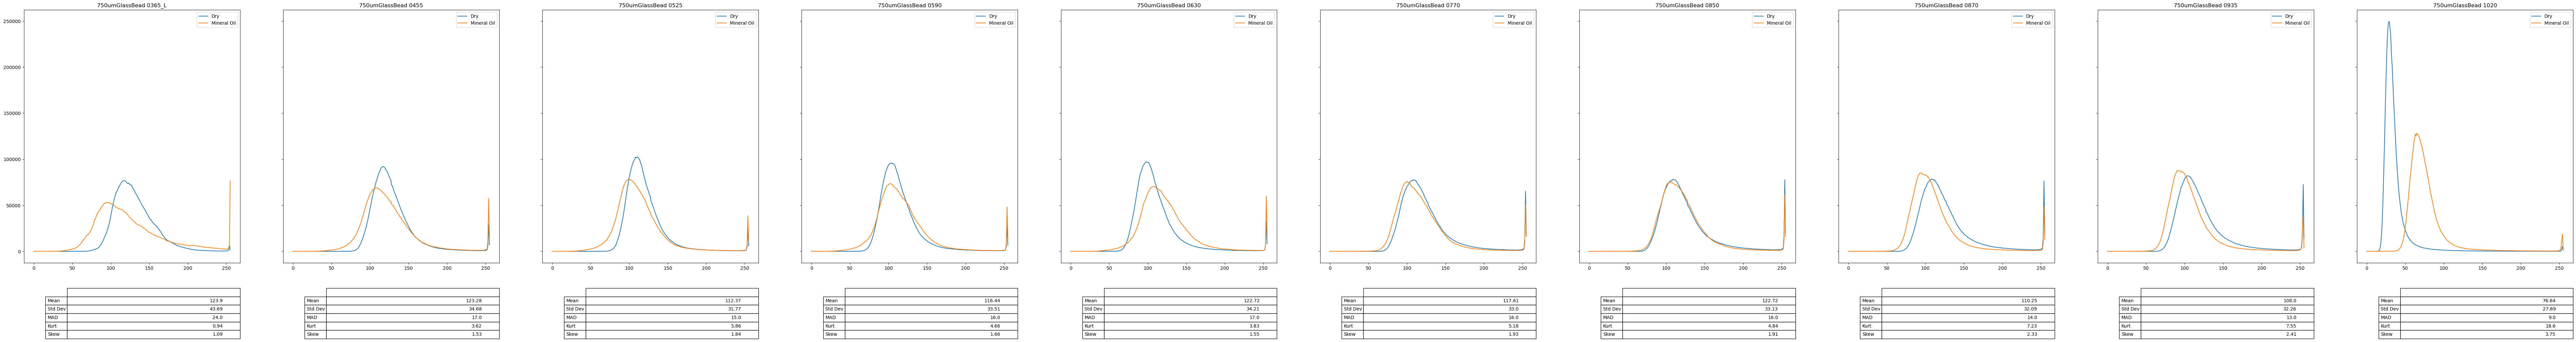

In [92]:
# Input the material to be analyzed
material = "750umGlassBead"

#Input the path to the SandImages folder on your machine
base = '/Users/fanjx1/Documents/SandImages'


#Returns a list of all the wavelengths found inside a path
def wavelengthList(search):
     wavelengths = []
     addresses = glob.glob(search)
     for address in addresses:
          wavelengths.append(os.path.basename(address))
     return [*np.unique(wavelengths)]


def ioOpen(imageFile):
    return io.imread(imageFile)


def createHistogram(ax_number, image, label, title):
     axes = ax_number.plot(pd.DataFrame(PIL.Image.open(image).histogram()), label = label)
     ax_number.legend(loc='best')
     axs[axsCount].set_title(title)
     return axes


def statList(imageArray):
    return [np.mean(imageArray, axis=(0, 1)).round(2),
            np.std(imageArray, axis=(0, 1)).round(2),
            scipy.stats.median_abs_deviation(imageArray, axis = (0,1)),
            round(scipy.stats.kurtosis(imageArray, axis = (0,1)),2),
            round(scipy.stats.skew(imageArray, axis = (0,1)),2)]

#Searching for all wavelengths that a material was imaged in
searchPath = os.path.join(base, 'Composites', '*' + material + '*', '*')
wavelengths = wavelengthList(searchPath)

fig, axs = plt.subplots(1,len(wavelengths), figsize = ((len(wavelengths)*10),10), sharey = True)
axsCount = 0
stats = {}

#A combination is a condition (dry/water/oil...) and a material (walnut shell/glass beads/anthracite...)
#This finds all the combinations for the selected material in each wavelength, overlays the histograms on a plot and
#displays the histogram statistics below each plot
for wavelength in wavelengths:
     combinationsInWavelength = glob.glob(os.path.join(base,'Composites', '*' + material + '*','*' + wavelength + '*'))
     for combination in combinationsInWavelength:
          materialWavelength = material + ' ' + wavelength[:-6] 
          combName = os.path.basename(os.path.dirname(combination))
          createHistogram(axs[axsCount], combination, combName.partition('-')[2], materialWavelength)
          stats[materialWavelength] = statList(ioOpen(combination))

     statComparison = pd.DataFrame(stats, index = ['Mean', 'Std Dev', 'MAD', 'Kurt', 'Skew'])
     columnTruncated = [column.partition('-')[2] for column in statComparison.columns]

     wavelengthStats = mpl.table.table(axs[axsCount],
                     cellText= statComparison.values,
                     colLabels = columnTruncated,
                     rowLabels = statComparison.index,
                     bbox = (0.2,-0.3,0.8,0.2))
     wavelengthStats.auto_set_font_size(False)
     wavelengthStats.set_fontsize(10)
     stats.clear()
     axsCount += 1

materialName = combName.partition('-')[0]
pictureName = material + 'Histogram.png'
fig.savefig(os.path.join(base, 'ImageStatistics', materialName, pictureName), bbox_inches= 'tight')

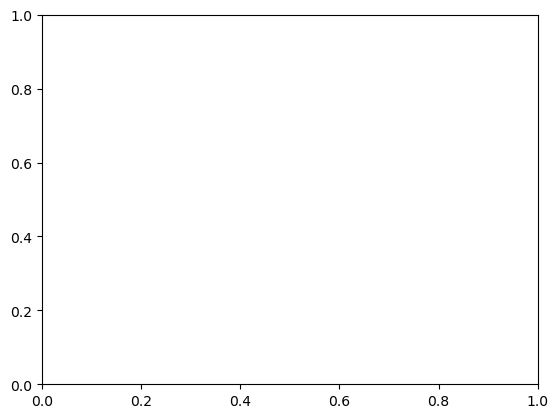

In [91]:
#generating and savingindividual graphs
# User input
material = "750umGlassBeads"

#finding the wavelengths present in the folder
base = '/Users/fanjx1/Documents/SandImages'


#Returns a list of all the wavelengths found inside a path
def wavelengthList(search):
     wavelengths = []
     addresses = glob.glob(search)
     for address in addresses:
          wavelengths.append(os.path.basename(address))
     return [*np.unique(wavelengths)]


def ioOpen(imageFile):
    return io.imread(imageFile)


def createHistogram(axs, image, label, title):
     axes = axs.plot(pd.DataFrame(PIL.Image.open(image).histogram()), label = label)
     axs.legend(loc='best')
     axs.set_title(title)
     return axes


def statList(imageArray):
    return [np.mean(imageArray, axis=(0, 1)).round(2),
            np.std(imageArray, axis=(0, 1)).round(2),
            scipy.stats.median_abs_deviation(imageArray, axis = (0,1)),
            round(scipy.stats.kurtosis(imageArray, axis = (0,1)),2),
            round(scipy.stats.skew(imageArray, axis = (0,1)),2)]


#Searching for all wavelengths that a material was imaged in
searchPath = os.path.join(base, 'Composites', '*' + material + '*', '*')
wavelengths = wavelengthList(searchPath)

fig, axs = plt.subplots()
stats = {}

#A combination is a condition (dry/water/oil...) and a material (walnut shell/glass beads/anthracite...)
#This finds all the combinations for the selected material in each wavelength, overlays the histograms on a plot and
#displays the histogram statistics below each plot
for wavelength in wavelengths:
     combinationsInWavelength = glob.glob(os.path.join(base,'Composites', '*' + material + '*','*' + wavelength + '*'))
     for combination in combinationsInWavelength: 
          matWave = material + ' ' + wavelength[:-6] 
          combName = os.path.basename(os.path.dirname(combination))
          createHistogram(axs, combination, combName.partition('-')[2], matWave)
          stats[matWave] = statList(ioOpen(combination))
     axs.set_title(material + " " + wavelength.replace('-','')[:-5])

     statComparison = pd.DataFrame(stats, index = ['Mean', 'Std Dev', 'MAD', 'Kurt', 'Skew'])

     columnTruncated = [column.partition('-')[2] for column in statComparison.columns]

     wavelengthStats = mpl.table.table(axs,
                     cellText= statComparison.values,
                     colLabels = columnTruncated,
                     rowLabels = statComparison.index,
                     bbox = (0.2,-0.5,0.8,0.4))
     wavelengthStats.auto_set_font_size(False)
     wavelengthStats.set_fontsize(10)

     #Saves the current figure with histogram and statistics so it can be reused for the next wavelength.
     matName = combName.partition('-')[0]
     pictureName = material + wavelength.replace('-','')[:-5] + 'Histogram.png'
     fig.savefig(os.path.join(base, 'ImageStatistics', matName, pictureName), bbox_inches= 'tight')
     stats.clear()
     axs.clear()


## Hist Stat v Wavelength for each condition, by Material

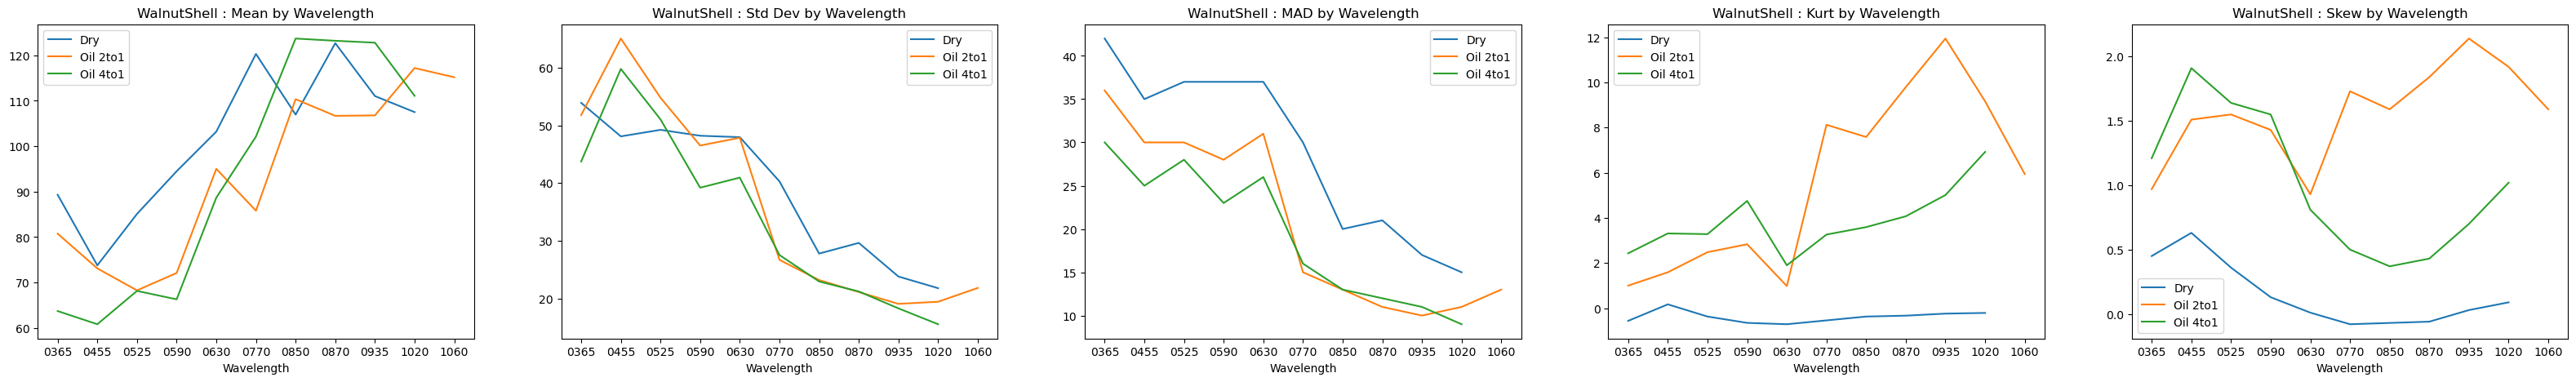

In [94]:
#histogram statistic profiles

# User input
material = "WalnutShell"

#Path to SandImages folder
base = '/Users/fanjx1/Documents/SandImages'


def statList(image):
    return [np.mean(image, axis=(0, 1)).round(2),
            np.std(image, axis=(0, 1)).round(2),
            scipy.stats.median_abs_deviation(image, axis = (0,1)),
            round(scipy.stats.kurtosis(image, axis = (0,1)),2),
            round(scipy.stats.skew(image, axis = (0,1)),2)]


def ioOpen(image):
    return io.imread(image)


def conditionList(search):
     conds = []
     addresses = glob.glob(search)
     for address in addresses:
          conds.append(os.path.dirname(address))
     return [*np.unique(conds)]


searchPath = os.path.join(base, 'Composites', '*' + material + '*', '*')
conditions = conditionList(searchPath)
stats = {}

fig, axs = plt.subplots(1,5, figsize = (40,5))

#For each condition, find the and sort the wavelengths present
for condition in conditions:
     wavelengthsInCondition = glob.glob(os.path.join(condition, '*'))
     wavelengthsInCondition.sort()
     

     #Get the statistics for each wavelength and store them in a dictionary
     for wavelength in wavelengthsInCondition:
          wave = os.path.basename(wavelength)[:4]
          stats[wave] = statList(ioOpen(wavelength))

     #Create dataframe that will be graphed from and resets the dictonary for the next statistic
     statIndex = ['Mean', 'Std Dev', 'MAD', 'Kurt', 'Skew']
     combName = os.path.basename(condition) #A combination is a condition (dry/water/oil...) and a material (walnut shell/glass beads/anthracite...)
     statData = pd.DataFrame(stats, index = statIndex)
     stats.clear()

     #Plotting the respective statistics by wavelength profile on each axis for the given condition
     statCount = 0
     for stat in statIndex:
          axs[statCount].set_title(material + ' : ' + stat + ' by Wavelength')
          axs[statCount].plot(statData.loc[stat], label = combName.partition('-')[2])
          axs[statCount].legend(loc='best')
          axs[statCount].xaxis.set_label_text('Wavelength')
          statCount += 1 

materialName = combName.partition('-')[0]
pictureName = material + 'StatisticsProfiles.png'
fig.savefig(os.path.join(base, 'ImageStatistics', materialName, pictureName), bbox_inches= 'tight')

## Box Plots

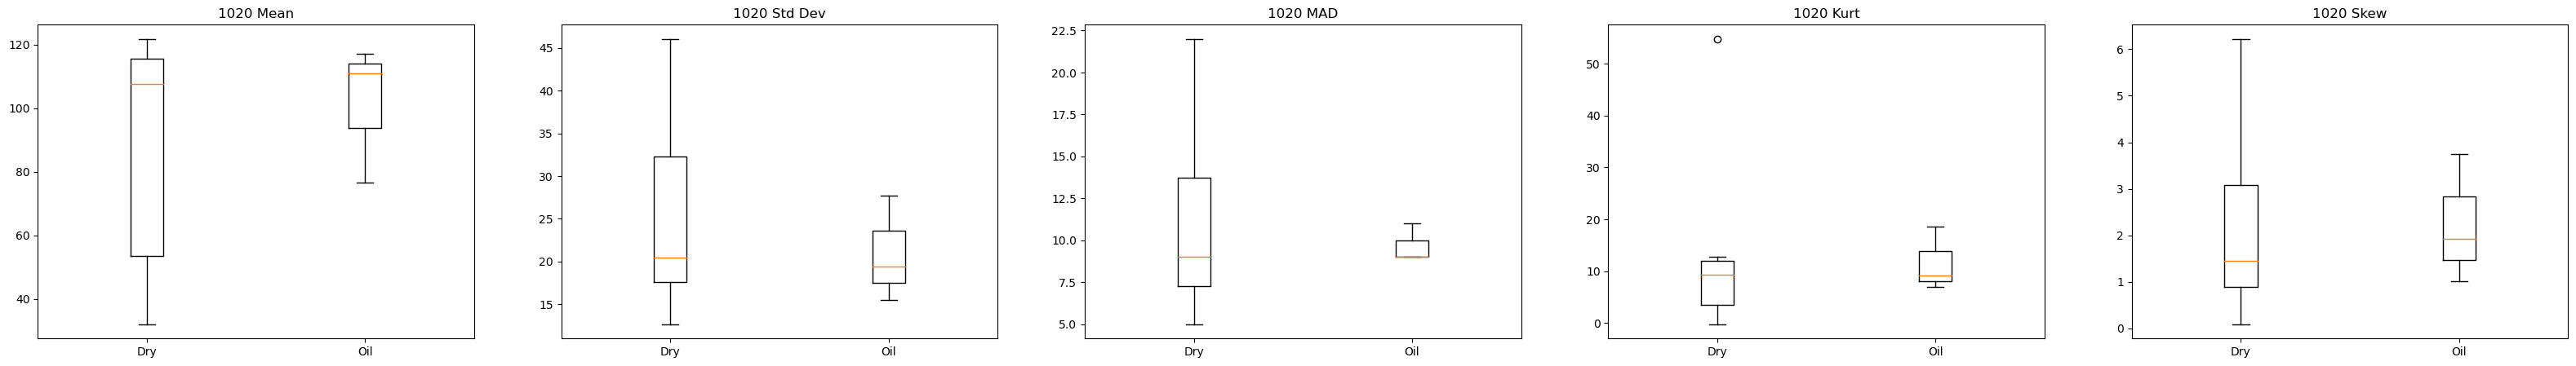

In [100]:
#may not be valid, not enough data points yet

# User input
#455, 525, 590, 630, 770, 850, 870, 935, 1020
wavelength = "1020"

#must add in all conditions
possibleConditions = ['Dry', 'Water', 'Oil', 'Glycerin']

#finding the wavelengths present in the folder
base = '/Users/fanjx1/Documents/SandImages'


def ioOpen(image):
    return io.imread(image)


def addressList(search):
    conds = []
    addresses = glob.glob(search)
    for address in addresses:
        conds.append(os.path.dirname(address))
    return addresses


#Finds all the conditions that are present in the choosen wavelength
#then assign conditions as keys in a dictionary and sorts images to them.
def condSort(conds, images):
    existing = []
    for cond in conds:
        if any(cond in image for image in images):
            existing.append(cond)
    # display(existing)
    condDict = {cond : [] for cond in existing}
    for image in images:
        [condDict[cond].append(image) for cond in conds if cond in image]
    return condDict


def statList(image):
    return [np.mean(image, axis=(0, 1)).round(2),
            np.std(image, axis=(0, 1)).round(2),
            scipy.stats.median_abs_deviation(image, axis = (0,1)),
            round(scipy.stats.kurtosis(image, axis = (0,1)),2),
            round(scipy.stats.skew(image, axis = (0,1)),2)]


#Gets statistics from a list of images and groups statistics by type (mean/standard deviation/skew...) in a list
def statsZip(imageList):
    stats = []
    for image in imageList:
        stats.append(statList(ioOpen(image)))
    conditionStats = list(zip(*stats))
    return conditionStats


searchPath = os.path.join(base, 'Composites', '**', '*' + wavelength + '*')
imageList = addressList(searchPath)
imagesSorted = condSort(possibleConditions, imageList)

fig, axs = plt.subplots(1, 5, figsize = (40,5))

#Create dataframe to be plotted from
statsDict = {}
for cond in imagesSorted.keys():
    statsDict[cond] = statsZip(imagesSorted[cond])
statIndex = ['Mean', 'Std Dev', 'MAD', 'Kurt', 'Skew']
materialStats = pd.DataFrame(statsDict, index = statIndex, columns = statsDict.keys())

#Plots a box plot of each condition's statistics on the respective statistic graph 
materialsStatList = []
axsCount = 0
for stat in materialStats.index:
    for condition in materialStats.columns:
        materialsStatList.append(np.array(materialStats.loc[stat, condition]))
    axs[axsCount].boxplot(materialsStatList, labels = materialStats.columns)
    axs[axsCount].set_title(wavelength + ' ' + stat)
    materialsStatList.clear()
    axsCount += 1

pictureName = wavelength + 'BoxPlots.png'
fig.savefig(os.path.join(base, 'ImageStatistics', 'ByWavelength', pictureName), bbox_inches= 'tight')

## Testing

In [ ]:
def ioOpen(image):
    return io.imread(image)
    
def statList(image):
    return [np.mean(image, axis=(0, 1)).round(2),
            np.std(image, axis=(0, 1)).round(2),
            scipy.stats.median_abs_deviation(image, axis = (0,1)),
            round(scipy.stats.kurtosis(image, axis = (0,1)),2),
            round(scipy.stats.skew(image, axis = (0,1)),2)]

# User input
material = "750um"
wavelength = '455'

#Setups 
search = '/Users/fanjx1/Documents/SandImages/Composites/*' + material + '*/*' + wavelength + '*' 
dict = {}

#
for file in glob.glob(search, recursive=True):
    name = os.path.basename(os.path.dirname(file)) + ' ' + os.path.basename(file)
    dict[name] = statList(ioOpen(file))
    display(name)
    
statComparison = pd.DataFrame(dict, index = ['Mean', 'Std Dev', 'MAD', 'Kurtosis', 'Skewness'])
statComparison


'750umGlassBeads-Dry 0455-.tiff'

'750umGlassBeads-Mineral Oil 0455-.tiff'

,750umGlassBeads-Dry 0455-.tiff,750umGlassBeads-Mineral Oil 0455-.tiff
Mean,127.45,123.28
Std Dev,26.63,34.68
MAD,13.00,17.00
Kurtosis,6.13,3.62
Skewness,1.99,1.53


In [ ]:
#Manual Stat Caluculations
def ijOpen(image):
    return ij.io().open(image)
    

def statList(image):
    return [ij.py.from_java(ij.op().stats().mean(image).toString()),
            ij.py.from_java(ij.op().stats().stdDev(image).toString()),
            ij.py.from_java(ij.op().stats().variance(image).toString())]

imageDry = ijOpen("/Users/fanjx1/Documents/SandImages/Composites/WalnutShell-Dry/0455-.tiff")
imageWet0 = ijOpen("/Users/fanjx1/Documents/SandImages/Composites/WalnutShell-Oil 4-1/0455-.tiff")
imageWet1 = ijOpen("/Users/fanjx1/Documents/SandImages/Composites/WalnutShell-Oil 2-1/0455-.tiff")
statsOne = {'Walnut Dry': statList(imageDry),                
            'Walnut Wet 4:1': statList(imageWet0),
            'Walnut Wet 2:1': statList(imageWet1)}

statComparison = pd.DataFrame(statsOne, index = ['Mean', 'Std Dev', 'Variance'])
statComparison

,Walnut Dry,Walnut Wet 4:1,Walnut Wet 2:1
Mean,73.77230243058762,60.81487065980238,73.10235897243513
Std Dev,48.10350078854532,59.792607439697115,65.06308127684571
Variance,2313.946788113596,3575.1559044373735,4233.204545237712


In [ ]:
#Statistics Test
stdDevTwo = ij.io().open("/Users/fanjx1/Documents/SandImages/Composites/WalnutShell-Oil 4to1/0455-.tiff")
display(round(ij.py.from_java(ij.op().stats().stdDev(stdDevTwo)).value,2))
display(round(ij.py.from_java(ij.op().stats().variance(stdDevTwo)).value,2))



59.79

3575.16

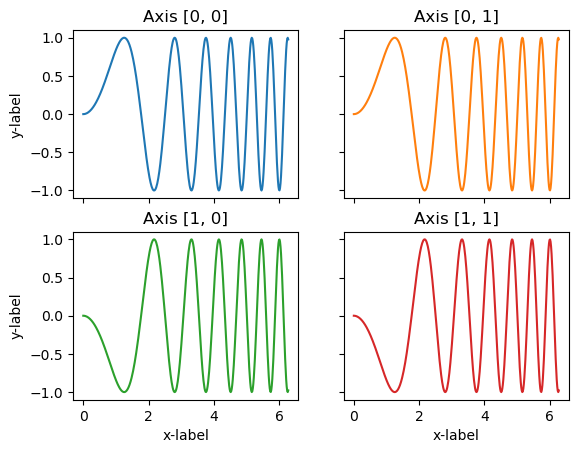

In [308]:
#stacking plot and graph together
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

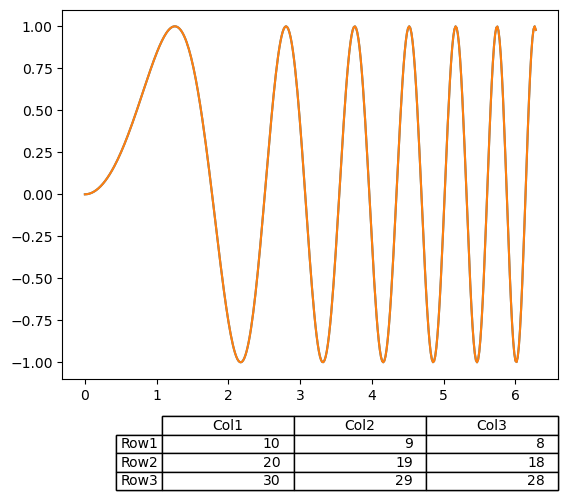

In [309]:
#subplot testing

x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

col_labels = ['Col1','Col2','Col3']
row_labels = ['Row1','Row2','Row3']
table_vals = pd.DataFrame([[10, 9, 8], 
                          [20, 19, 18], 
                          [30, 29, 28]])

plt.plot(x,y)

plt.table(cellText=table_vals.values,
          colLabels = col_labels,
          rowLabels = row_labels,
          bbox = (0.2,-0.3,0.8,0.2))

plt.draw()

plt.plot(x,y)

plt.table(cellText=table_vals.values,
          colLabels = col_labels,
          rowLabels = row_labels,
          bbox = (0.2,-0.3,0.8,0.2))
plt.draw()


Text(0.5, 1.0, '850nm')

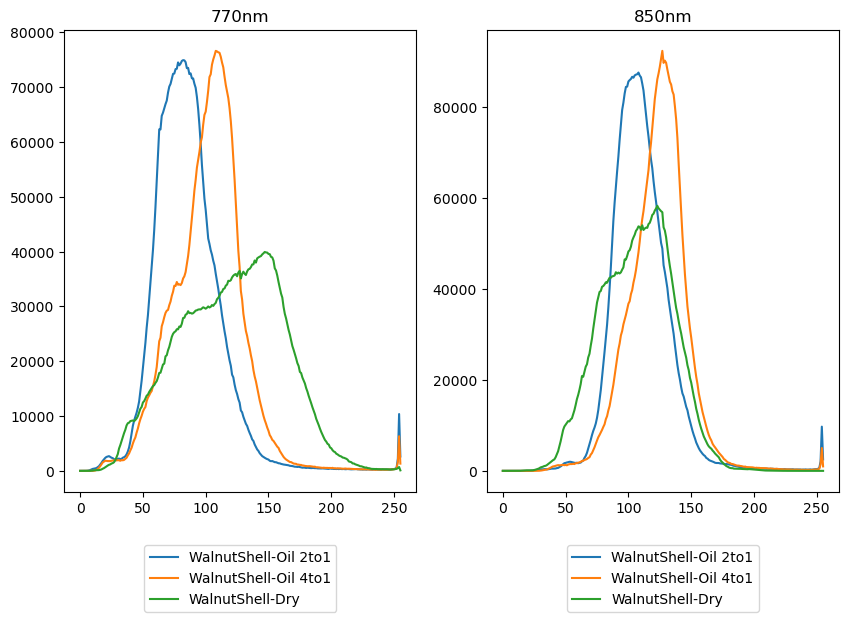

In [ ]:
#Manual Material Histogram by Wavelength
def hist1(image, name):
    return ax1.plot(pd.DataFrame(PIL.Image.open(image).histogram()), label = name)

def hist2(image, name):
   return ax2.plot(pd.DataFrame(PIL.Image.open(image).histogram()), label = name)

# User input
material1 = "Walnut"
wavelength1 = "770"

#Setups 
search = '/Users/fanjx1/Documents/SandImages/Composites/*' + material1 + '*/*' + wavelength1 + '*'

fig1, [ax1, ax2] = plt.subplots(1,2, figsize = (10,6))

#
for file in glob.glob(search, recursive=True):
    name = os.path.basename(os.path.dirname(file)) #for comparing different materials
    #name = os.path.basename(file) #for comparing wavelengths
    hist1(file, name)
    
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))
ax1.set_title(wavelength1 + 'nm')




material2 = "Walnut"
wavelength2 = "850"

#Setups 
search = '/Users/fanjx1/Documents/SandImages/Composites/*' + material2 + '*/*' + wavelength2 + '*'

#
for file in glob.glob(search, recursive=True):
    name = os.path.basename(os.path.dirname(file)) #for comparing different materials
    #name = os.path.basename(file) #for comparing wavelengths
    hist2(file, name)
    
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))
ax2.set_title(wavelength2 + 'nm')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


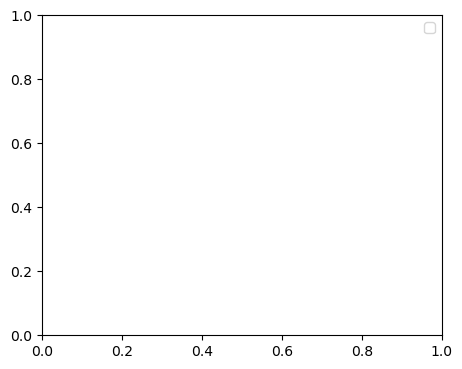

In [ ]:
#Wavelength Histogram by Material
def hist(image, name):
    return ax.plot(pd.DataFrame(PIL.Image.open(image).histogram()), label = name)

# User input
material = "Walnut*Oil 2-1"
wavelengths = []

#Setups 
search = '/Users/fanjx1/Documents/SandImages/Composites/*' + material + '*/*'

fig = plt.figure(figsize =(5, 4)) 
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

#
for file in glob.glob(search, recursive=True):
    name = os.path.basename(os.path.dirname(file)) #for comparing different materials
    name = os.path.basename(file) #for comparing wavelengths
    hist(file, name)
    
ax.legend()

plt.show() 

In [ ]:
#Manual Histogram

comparisonOne = PIL.Image.open('/Users/fanjx1/Documents/SandImages/Composites/WalnutShell-Dry/0455-.png')
comparisonTwo = PIL.Image.open('/Users/fanjx1/Documents/SandImages/Composites/WalnutShell-Oil 4-1/0455-.png')

fig = plt.figure(figsize =(5, 4)) 
    
ax = fig.add_axes([1, 1, 1, 1])
  
line1 = ax.plot(pd.DataFrame(comparisonOne.histogram()), label = 'Dry') 
line2 = ax.plot(pd.DataFrame(comparisonTwo.histogram()), label = 'Wet')
ax.legend()

plt.show() 

FileNotFoundError: [Errno 2] No such file or directory: '/Users/fanjx1/Documents/SandImages/Composites/WalnutShell-Dry/0455-.png'

# OpenCV Testing

???<br>
https://stackoverflow.com/questions/58821130/how-to-calculate-the-contrast-of-an-image <br>
https://stackoverflow.com/questions/4876315/determining-image-luminance-brightness/4876528#4876528 <br>
https://stackoverflow.com/questions/65467880/how-to-get-the-average-value-of-rgb-single-channel-of-multiple-images-with-numpy

In [ ]:
# dry = cv.imread('/Users/fanjx1/anaconda3/images/dryrock.png')
# wet = cv.imread('/Users/fanjx1/anaconda3/images/wetrock.png')

In [ ]:
# #I have no idea what these numbers mean but compared to each other it's what I expected
# dryContrast = cv.cvtColor(dry, cv.COLOR_BGR2GRAY).std()
# dryContrast

In [ ]:
# wetContrast = cv.cvtColor(wet, cv.COLOR_BGR2GRAY).std()
# wetContrast

In [ ]:
# #????
# dryYUV = cv.cvtColor(dry, cv.COLOR_BGR2YUV)
# dryAvgV = np.mean(dryYUV[:,:,0])
# dryAvgV

In [ ]:
# wetYUV = cv.cvtColor(wet, cv.COLOR_BGR2YUV)
# wetAvgV = np.mean(wetYUV[:,:,0])
# wetAvgV

In [ ]:
a = np.array([0,1,3,4])
b = np.array([0,3,4,5])
c = np.array([3,2,1,0])

ab = a+b
print(ab/2)

In [ ]:
test1 = np.array(PIL.Image.open('/Users/fanjx1/anaconda3/images/test1.tif')).astype(np.uint16)
test2 = np.array(PIL.Image.open('/Users/fanjx1/anaconda3/images/test2.tif')).astype(np.uint16)

avg = (test1+test2)/2
avg = avg.astype(np.uint8)
img = PIL.Image.fromarray(avg)
img.save('testing.png')

In [ ]:
pictures = []
for name in glob.glob('/Users/fanjx1/Documents/SandImages/40-70umGlassBeads-Dry/0525/*'):
    i = 0
    pictures.append(np.array(PIL.Image.open(name)).astype(np.uint16))
    i += 1
pictures

[array([[8, 0, 0, ..., 2, 0, 0],
        [0, 9, 0, ..., 0, 0, 0],
        [0, 6, 0, ..., 0, 0, 6],
        ...,
        [9, 0, 7, ..., 0, 0, 0],
        [0, 0, 1, ..., 2, 0, 1],
        [0, 0, 0, ..., 5, 0, 0]], dtype=uint16),
 array([[ 8,  5,  4, ...,  4,  3,  0],
        [ 5,  6,  0, ...,  0,  0,  8],
        [ 1,  0,  0, ...,  4,  0,  0],
        ...,
        [10,  0,  0, ...,  0,  0,  7],
        [ 0,  0, 10, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  5,  0, 11]], dtype=uint16),
 array([[171, 171, 166, ..., 192, 167, 175],
        [200, 137, 187, ..., 155, 176, 161],
        [167, 170, 196, ..., 190, 174, 181],
        ...,
        [125, 139, 131, ..., 135, 165, 160],
        [118, 109, 120, ..., 153, 172, 160],
        [140, 125, 127, ..., 148, 137, 155]], dtype=uint16),
 array([[2, 2, 0, ..., 2, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 5, 4, 9],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

In [ ]:
# folder = "/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0525"
# files = [f for f in os.listdir(folder) if not f.startswith('.')]
# path = "{}/{}".format(folder, files[0])
# average = cv.imread(path).astype(float)
# for f in files[1:]:
#     path = "{}/{}".format(folder, f)
#     image = cv.imread(path)
#     average += image
# average /= len(image_files)
# output = cv.normalize(average, None, 0, 255, cv.NORM_MINMAX)
# cv.imwrite("output.jpg", output)